# Практический кейс промежуточной аттестации №1. Голомидов Евгений Вячеславович.

# Импорты

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import tree
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
import pickle
from sklearn.dummy import DummyRegressor
%matplotlib inline

## Загрузка датасета

In [5]:
df = pd.read_csv("test.csv")

## Изучение датасета

In [ ]:
df   # отображение всего набора данных

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72
68,45,146,9.0,60,1.36,1.76
69,45,146,9.0,60,1.28,1.76
70,45,146,9.0,60,1.28,1.76


In [ ]:
df.sample(5)  # Отображение 5 случайно выбранных строк

,IW,IF,VW,FP,Depth,Width
70,45,146,9.0,60,1.28,1.76
23,47,141,12.0,80,1.08,1.72
20,47,141,12.0,80,1.12,1.71
61,43,146,9.0,60,1.24,1.80
8,45,140,8.0,80,1.20,2.00


In [ ]:
df.head(5)  # Отображение 5 первых строк.

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [ ]:
df.info()   # информациz о данных: количество столбцов, количество значений в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [ ]:
df.isna().sum()   #  Проверка наличия пропущенных значений

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

Пропусков нет

In [ ]:
df.describe()   # Описательная статистику каждой числовой функции. Здесь мы получаем количество значений,
                # среднее значение, стандартное отклонение и процентили для каждого столбца.

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


<Axes: >

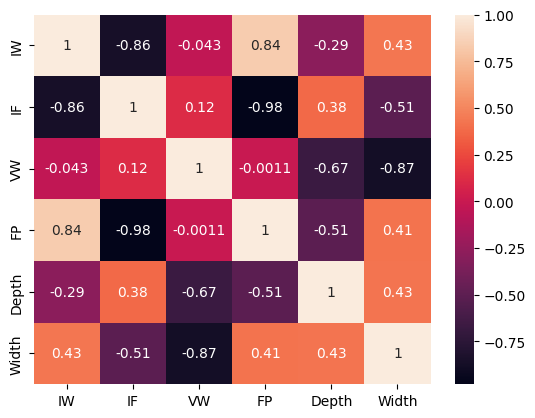

In [ ]:
sns.heatmap(df.corr(), annot=True)   # Построение тепловой карты корреляции при помощи библиотеки seaborn

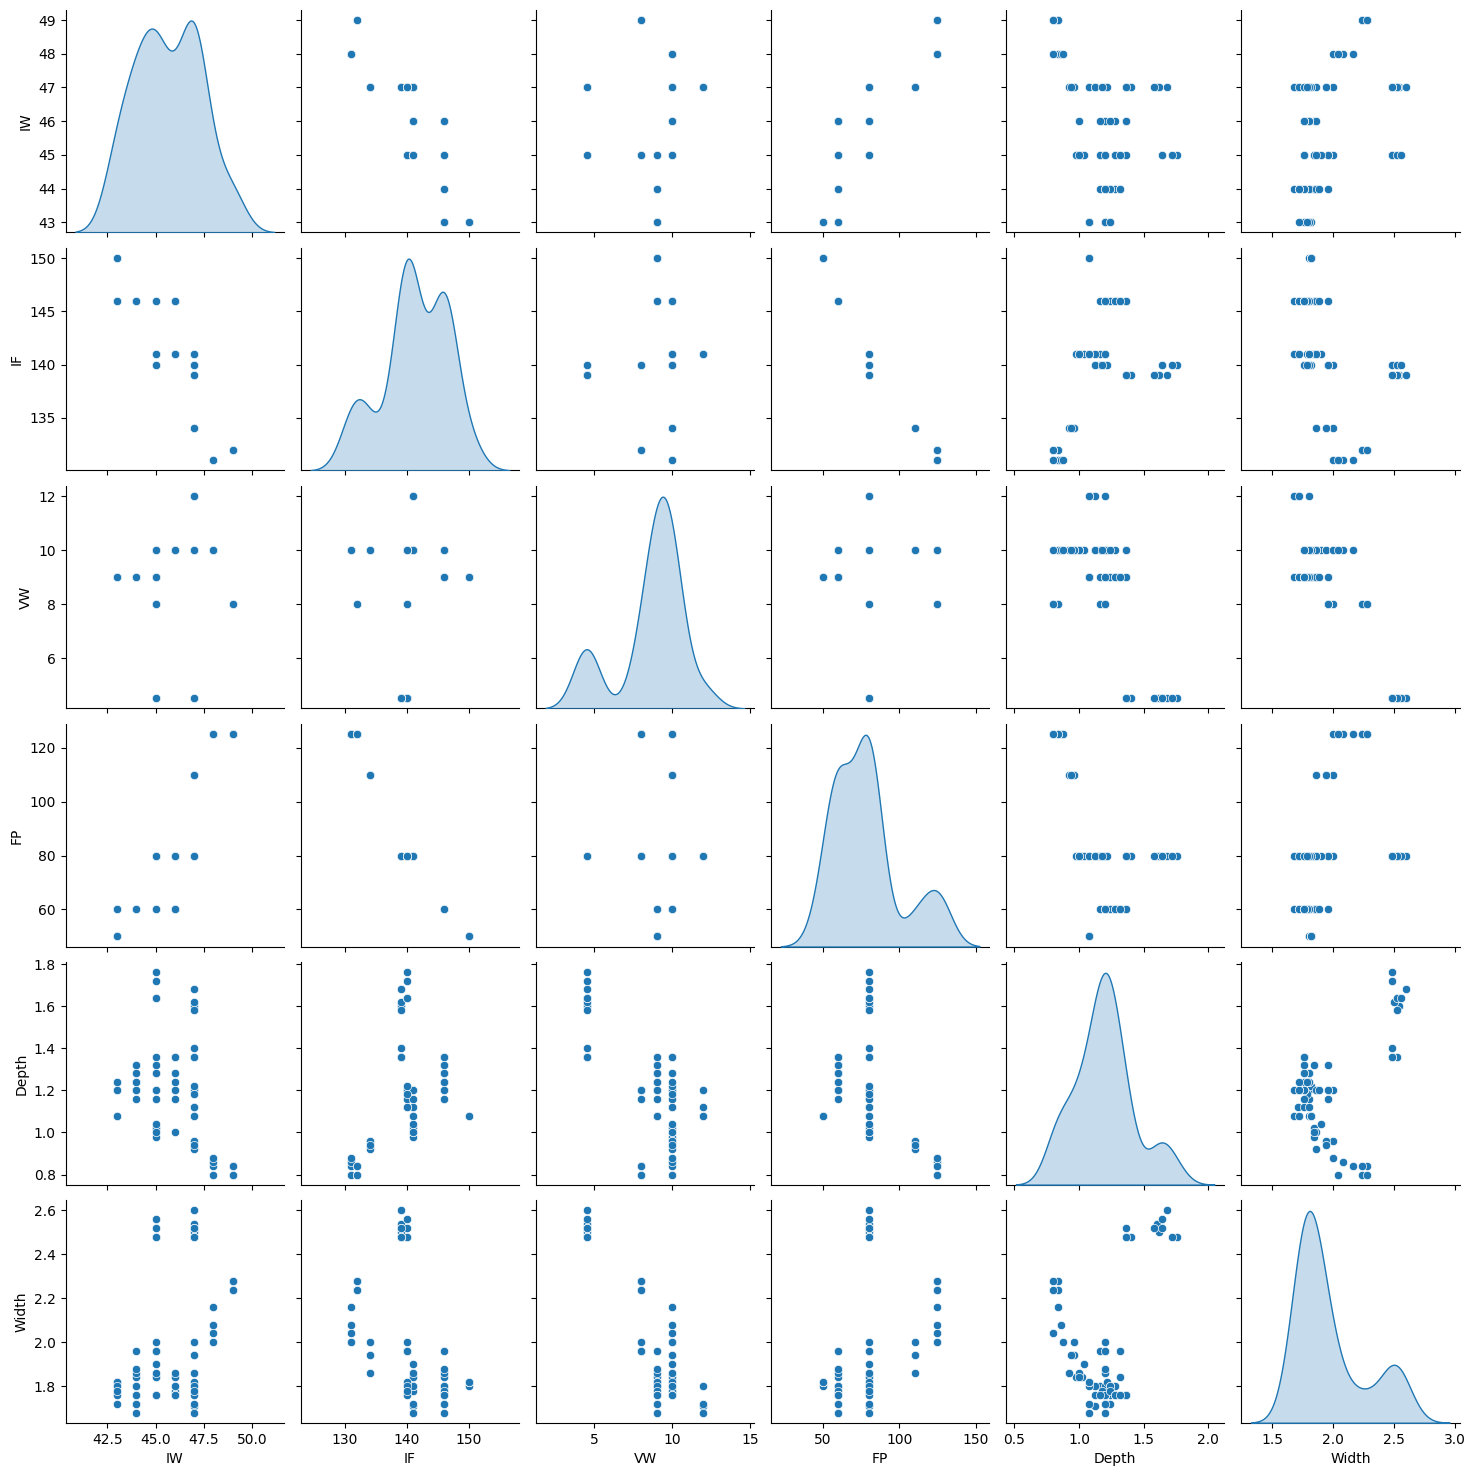

In [ ]:
sns.pairplot(df, diag_kind='kde')

# Подготовка датасета

In [ ]:
X = df[['IW', 'IF', 'VW', 'FP']].values # входные параметры
y = df[['Depth', 'Width']].values # выходные параметры

#X = df.drop([['Width', 'Depth']], axis=1)
#y = df[['Width', 'Depth']].copy()

In [ ]:
#sns.displot(X.IW, kde=True)

In [ ]:
#sns.displot(X.IF, kde=True)

In [ ]:
#sns.displot(X.VW, kde=True)

In [ ]:
#sns.displot(X.FP, kde=True)

In [ ]:
#sns.displot(y.Depth, kde=True)

In [ ]:
#sns.displot(y.Width, kde=True)

In [ ]:
#Разбиваем выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # Размерность параметров

((57, 4), (15, 4), (57, 2), (15, 2))

# Метод линейной регрессии

In [ ]:
# Обучаем модель линейной регресии
model_lr = LinearRegression()

In [ ]:
# обучаем модель с параметрами по умолчанию
model_lr.fit(X_train, y_train)


In [ ]:
model_lr.coef_

array([[ 0.1711745 ,  0.04908342, -0.88226416,  0.31322497],
       [ 0.21655166, -1.51791877, -0.45756562, -2.0001329 ]])

### Оценка модели

In [ ]:
# прогнозные значения
y_pred = model_lr.predict(X_test)


In [ ]:
MAE = metrics.mean_absolute_error(y_test, y_pred)  # Средняя абсолютная ошибка

In [ ]:
MSE = metrics.mean_squared_error(y_test, y_pred)  # Среднеквадратичная ошибка

In [ ]:
MAE

0.08929244755343549

In [ ]:
MSE

0.01375290548345732

In [ ]:
(1 - MAE / y_train.mean()) * 100    # MAPE, средняя квадратичная ошибка в процентах

94.3255816817595

# Нейронная сеть

In [ ]:
model_2n = tf.keras.layers.Normalization(axis =- 1)

In [ ]:
model_2n.adapt(np.array(X))

In [ ]:
def build():
    return tf.keras.Sequential([
      keras.layers.Input(shape = (4,), name = 'in'),
      keras.layers.Dense(units = 64, activation = 'relu', name = 'dense_1'),
      keras.layers.Dense(units = 32, activation = 'relu', name = 'dense_2'),
      keras.layers.Dense(units = 12, activation = 'relu', name = 'dense_3'),
      keras.layers.Dense(units = 2, name = 'out')
    ])

In [ ]:
def build_and_comp(model):
    model.compile(
             optimizer = keras.optimizers.Adam(),
             loss = keras.losses.MeanAbsolutePercentageError(),
             metrics = [tf.keras.metrics.RootMeanSquaredError()]
             )
    return model


In [ ]:
# Функция для построения графика ошибки
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize = (12, 5))
  axes[0].plot(history['loss'], label = 'loss')
  axes[0].plot(history['val_loss'], label = 'val_loss')
  axes[0].set_xlabel('Эпоха')
  axes[0].set_ylabel('MAPE')
  axes[0].legend()
  axes[0].grid(True)
  axes[1].plot(history['root_mean_squared_error'], label = 'loss')
  axes[1].plot(history['val_root_mean_squared_error'], label = 'val_loss')
  axes[1].set_xlabel('Эпоха')
  axes[1].set_ylabel('RMSE')
  axes[1].legend()
  axes[1].grid(True)
  plt.show()

In [ ]:
def rass_snach(original_y, predicted_y):
    plt.figure(figsize = (10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size = 15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size = 12)
    plt.ylabel('Прогнозные значения', size = 12)
    plt.show()

In [ ]:
# Базовая модель
bas_mod_1 = DummyRegressor(strategy = 'median')
# Предсказание базовой модели
bas_mod_1.fit(X_train, y_train)
y_pred_bas_1 = bas_mod_1.predict(X_test)

In [ ]:
# cборка
model_1 = build()

In [ ]:
# компиляция
model_1 = build_and_comp(model_1)

In [ ]:
# сводная информация по архитектуре сети
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 12)                396       
                                                                 
 out (Dense)                 (None, 2)                 26        
                                                                 
Total params: 2822 (11.02 KB)
Trainable params: 2822 (11.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


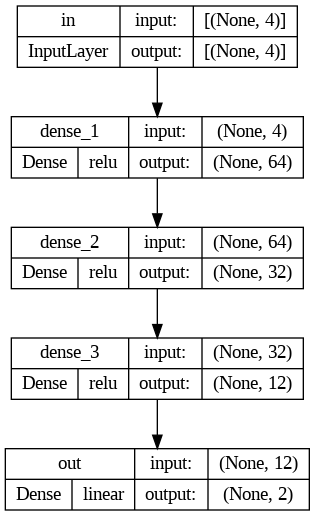

In [ ]:
# архитектура нейросети
keras.utils.plot_model(model_1, show_shapes = True, show_layer_names = True, show_layer_activations = True)

In [ ]:
%%time
#обучение нейросети
history_1 = model_1.fit(
  X,
  y,
  epochs = 300,
  validation_data = (X_test,y_test),
  verbose = 1
)

Epoch 1/300
3/3 [==============================] - 1s 110ms/step - loss: 2299.5505 - root_mean_squared_error: 41.4216 - val_loss: 103.1234 - val_root_mean_squared_error: 1.8107
Epoch 2/300
3/3 [==============================] - 0s 17ms/step - loss: 1256.3292 - root_mean_squared_error: 29.3428 - val_loss: 105.0564 - val_root_mean_squared_error: 1.7859
Epoch 3/300
3/3 [==============================] - 0s 19ms/step - loss: 1049.4146 - root_mean_squared_error: 21.0642 - val_loss: 104.6638 - val_root_mean_squared_error: 1.7573
Epoch 4/300
3/3 [==============================] - 0s 27ms/step - loss: 863.2645 - root_mean_squared_error: 16.6304 - val_loss: 103.3596 - val_root_mean_squared_error: 1.7288
Epoch 5/300
3/3 [==============================] - 0s 18ms/step - loss: 581.0715 - root_mean_squared_error: 12.8818 - val_loss: 101.9948 - val_root_mean_squared_error: 1.7051
Epoch 6/300
3/3 [==============================] - 0s 17ms/step - loss: 464.3399 - root_mean_squared_error: 10.9340 - val

In [ ]:
y_pred = model_1.predict(X_test)

1/1 [==============================] - 0s 93ms/step


In [ ]:
y_pred



array([[-0.05018773,  0.15103987],
       [-0.05018773,  0.15103987],
       [-0.01134297,  0.04166689],
       [-0.06008661,  0.11267774],
       [ 0.00081124,  0.11834565],
       [-0.01134297,  0.04166689],
       [ 0.01359757,  0.09324649],
       [-0.01134297,  0.04166689],
       [-0.04866106,  0.16355544],
       [-0.02119444,  0.0667209 ],
       [-0.01134297,  0.04166689],
       [ 0.00081124,  0.11834565],
       [ 0.00081124,  0.11834566],
       [-0.05072984,  0.12165731],
       [-0.04866102,  0.1635554 ]], dtype=float32)

In [ ]:
y_test

array([[0.92, 1.86],
       [0.94, 1.94],
       [1.28, 1.8 ],
       [1.2 , 1.8 ],
       [1.4 , 2.48],
       [1.32, 1.96],
       [1.64, 2.56],
       [1.2 , 1.76],
       [0.88, 2.  ],
       [1.32, 1.76],
       [1.2 , 1.76],
       [1.36, 2.52],
       [1.36, 2.48],
       [1.12, 1.8 ],
       [0.86, 2.08]])

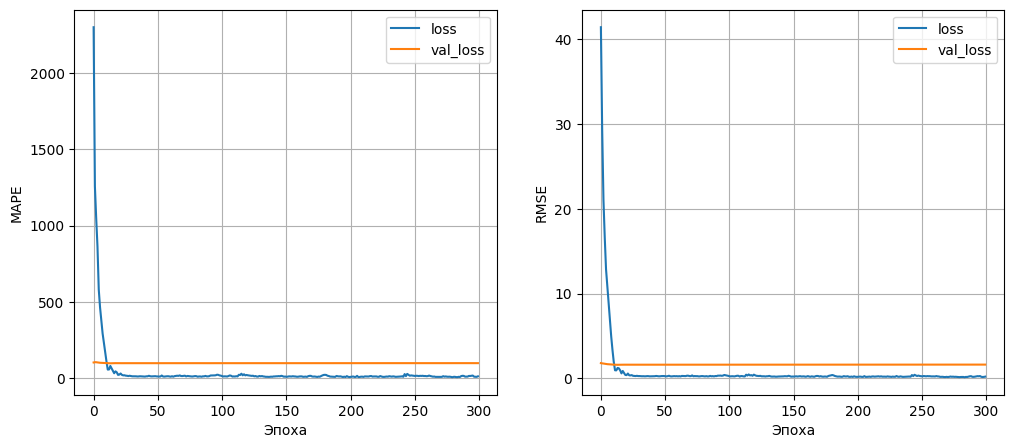

In [ ]:
plot_loss(history_1.history)

In [ ]:
# точность нейросети на тестовых данных
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 41ms/step - loss: 98.6646 - root_mean_squared_error: 1.6373


[98.6646499633789, 1.6372894048690796]

In [ ]:
# предсказание
y_pred_keras1 = model_1.predict(X_test)


1/1 [==============================] - 0s 20ms/step


In [ ]:
y_pred_keras1

array([[-0.05018773,  0.15103987],
       [-0.05018773,  0.15103987],
       [-0.01134297,  0.04166689],
       [-0.06008661,  0.11267774],
       [ 0.00081124,  0.11834565],
       [-0.01134297,  0.04166689],
       [ 0.01359757,  0.09324649],
       [-0.01134297,  0.04166689],
       [-0.04866106,  0.16355544],
       [-0.02119444,  0.0667209 ],
       [-0.01134297,  0.04166689],
       [ 0.00081124,  0.11834565],
       [ 0.00081124,  0.11834566],
       [-0.05072984,  0.12165731],
       [-0.04866102,  0.1635554 ]], dtype=float32)

In [ ]:
y_test

array([[0.92, 1.86],
       [0.94, 1.94],
       [1.28, 1.8 ],
       [1.2 , 1.8 ],
       [1.4 , 2.48],
       [1.32, 1.96],
       [1.64, 2.56],
       [1.2 , 1.76],
       [0.88, 2.  ],
       [1.32, 1.76],
       [1.2 , 1.76],
       [1.36, 2.52],
       [1.36, 2.48],
       [1.12, 1.8 ],
       [0.86, 2.08]])

In [ ]:
original_1 = y_test
predicted_1 = y_pred_keras1

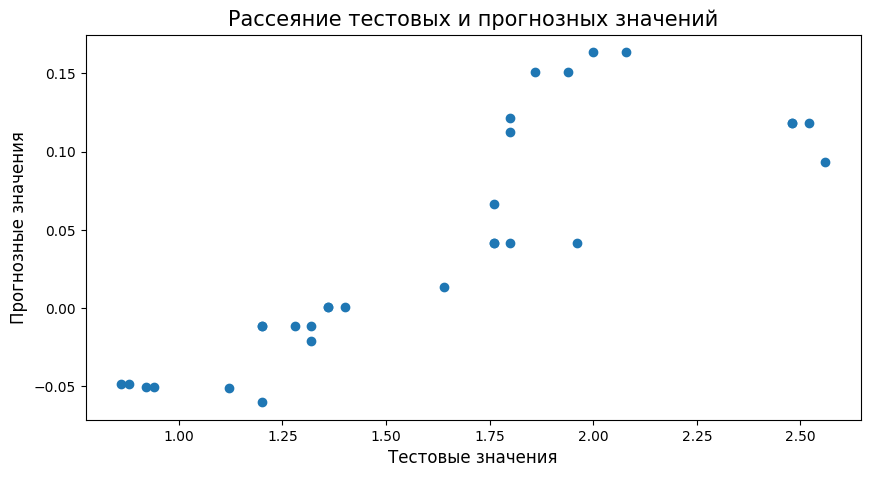

In [ ]:
rass_snach(original_1, predicted_1)

### Ранняя остановка

In [ ]:
model_2 = build()
model_2 = build_and_comp(model_2)

In [ ]:
%%time
#обучение
history_2 = model_2.fit(
  X_train,
  y_train,
  epochs = 300,
  validation_split = 0.3,
  verbose = 1,
  callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)]
)



Epoch 1/300
2/2 [==============================] - 1s 201ms/step - loss: 101.3766 - root_mean_squared_error: 1.6734 - val_loss: 98.5852 - val_root_mean_squared_error: 1.6388
Epoch 2/300
2/2 [==============================] - 0s 34ms/step - loss: 98.5667 - root_mean_squared_error: 1.6443 - val_loss: 95.6865 - val_root_mean_squared_error: 1.6127
Epoch 3/300
2/2 [==============================] - 0s 31ms/step - loss: 96.2570 - root_mean_squared_error: 1.6217 - val_loss: 93.0972 - val_root_mean_squared_error: 1.5923
Epoch 4/300
2/2 [==============================] - 0s 39ms/step - loss: 93.9629 - root_mean_squared_error: 1.6015 - val_loss: 90.7996 - val_root_mean_squared_error: 1.5771
Epoch 5/300
2/2 [==============================] - 0s 31ms/step - loss: 91.7436 - root_mean_squared_error: 1.5846 - val_loss: 88.4438 - val_root_mean_squared_error: 1.5627
Epoch 6/300
2/2 [==============================] - 0s 32ms/step - loss: 89.6372 - root_mean_squared_error: 1.5699 - val_loss: 85.9377 - va

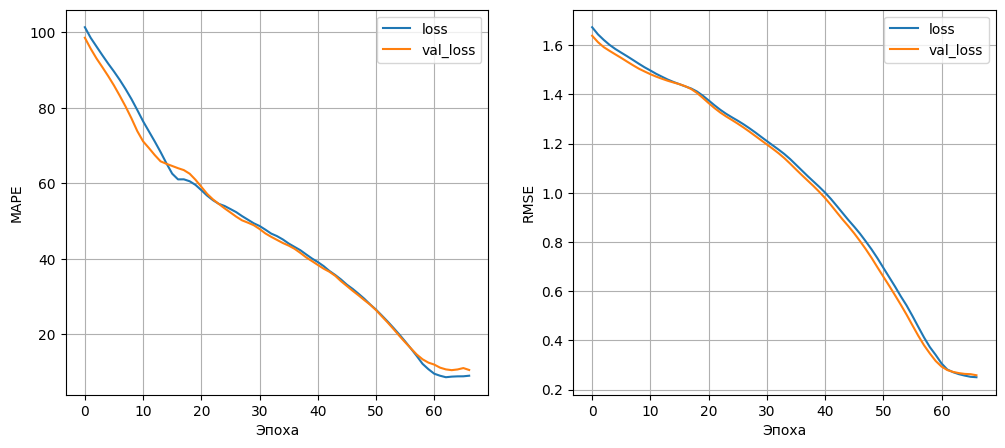

In [ ]:
plot_loss(history_2.history)

In [ ]:
# точность нейросети на тестовых данных
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 27ms/step - loss: 9.9286 - root_mean_squared_error: 0.2850


[9.928597450256348, 0.28503233194351196]

In [ ]:
# предсказание
y_pred_keras2 = model_2.predict(X_test)

1/1 [==============================] - 0s 66ms/step


In [ ]:
original_2 = y_test
predicted_2 = y_pred_keras2

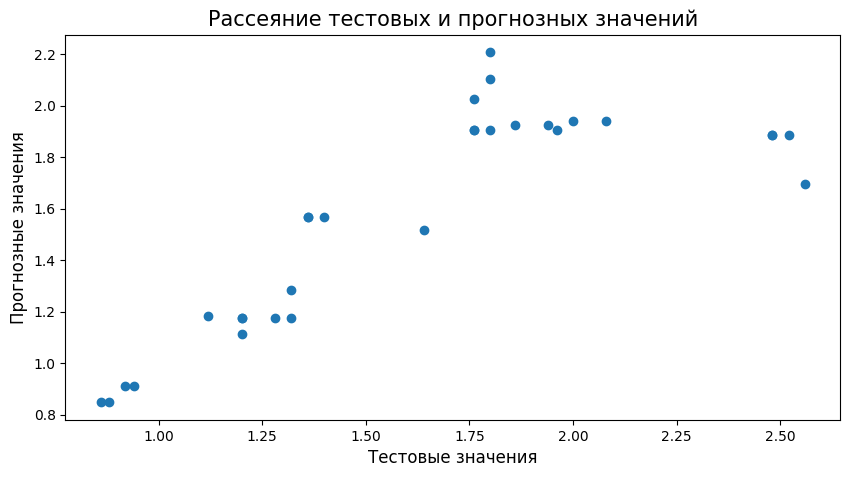

In [ ]:
rass_snach(original_2, predicted_2)

### Добавление Dropout слоя


In [ ]:
# построение тождественной модели с Dropout слоем
model_3 = tf.keras.Sequential([
      keras.layers.Input(shape = (4,), name = 'in'),
      keras.layers.Dense(units = 64, activation = 'relu', name = 'dense_1'),
      keras.layers.Dropout(0.05, name = 'dropout_1'),
      keras.layers.Dense(units = 32, activation = 'relu', name = 'dense_2'),
      keras.layers.Dropout(0.05, name = 'dropout_2'),
      keras.layers.Dense(units = 12, activation = 'relu', name = 'dense_3'),
      keras.layers.Dropout(0.05, name = 'dropout_3'),
      keras.layers.Dense(units = 1, name = 'out')
    ])

In [ ]:
model_3 = build_and_comp(model_3)
# архитектура не изменилась
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                396       
                                                                 
 dropout_3 (Dropout)         (None, 12)                0         
                                                                 
 out (Dense)                 (None, 1)                

In [ ]:
%%time
#обучение
history_3 = model_3.fit(
  X_train,
  y_train,
  epochs = 300,
  validation_split = 0.3,
  verbose = 1
)

Epoch 1/300
2/2 [==============================] - 1s 170ms/step - loss: 100.8659 - root_mean_squared_error: 1.6516 - val_loss: 97.3027 - val_root_mean_squared_error: 1.5947
Epoch 2/300
2/2 [==============================] - 0s 31ms/step - loss: 98.0172 - root_mean_squared_error: 1.6110 - val_loss: 93.4229 - val_root_mean_squared_error: 1.5436
Epoch 3/300
2/2 [==============================] - 0s 43ms/step - loss: 94.2557 - root_mean_squared_error: 1.5587 - val_loss: 89.5935 - val_root_mean_squared_error: 1.4932
Epoch 4/300
2/2 [==============================] - 0s 34ms/step - loss: 91.3200 - root_mean_squared_error: 1.5181 - val_loss: 85.5879 - val_root_mean_squared_error: 1.4412
Epoch 5/300
2/2 [==============================] - 0s 31ms/step - loss: 88.3387 - root_mean_squared_error: 1.4835 - val_loss: 81.5036 - val_root_mean_squared_error: 1.3886
Epoch 6/300
2/2 [==============================] - 0s 31ms/step - loss: 82.4539 - root_mean_squared_error: 1.4051 - val_loss: 77.4356 - va

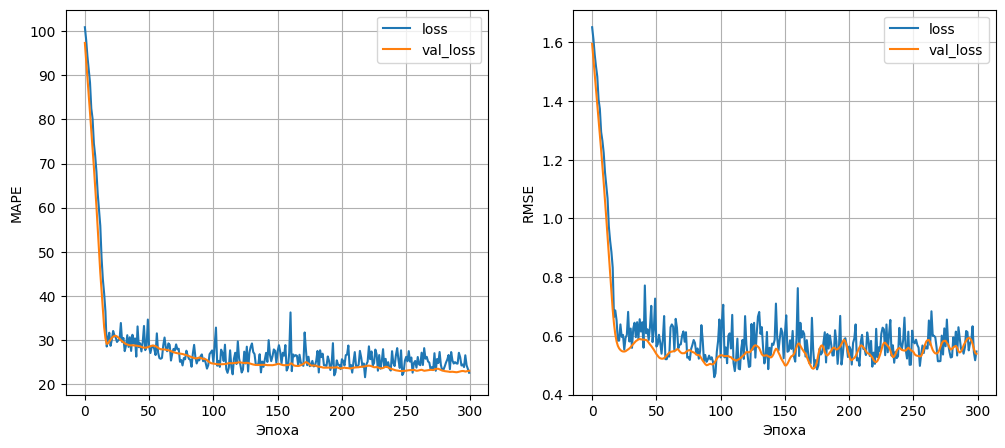

In [ ]:
plot_loss(history_3.history)

# Сохранение моделей

In [ ]:
pickle.dump(model_lr, open('model_lr.pkl', 'wb'))

In [ ]:
pickled_model_lr = pickle.load(open('model_lr.pkl', 'rb'))

In [ ]:
pickled_model_lr.predict(X_test)

array([[0.90528138, 1.96099738],
       [0.90528138, 1.96099738],
       [1.2327507 , 1.81522876],
       [1.02408382, 1.61852032],
       [1.64143036, 2.4956178 ],
       [1.2327507 , 1.81522876],
       [1.48935601, 2.44114297],
       [1.2327507 , 1.81522876],
       [0.78101813, 2.04442145],
       [1.26884265, 1.84375785],
       [1.2327507 , 1.81522876],
       [1.64143036, 2.4956178 ],
       [1.64143036, 2.4956178 ],
       [1.22599178, 1.85120742],
       [0.78101813, 2.04442145]])

In [ ]:
model_1.save('model_1')

In [ ]:
model_loaded = keras.models.load_model('model_1')

In [ ]:
import shutil
shutil.make_archive('model_1', 'zip', 'model_1')

'/content/model_1.zip'